<a href="https://colab.research.google.com/github/SalmaAlshehawy/logistic_regression_project/blob/main/logistic_regression_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import pandas as pd

# The data is in a .data file and separated by commas.
# The first few lines are metadata and should be skipped.

features = features = [
    "ID number",
    "Diagnosis",
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave points_mean",
    "symmetry_mean",
    "fractal_dimension_mean",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave points_se",
    "symmetry_se",
    "fractal_dimension_se",
    "radius_worst",
    "texture_worst",
    "perimeter_worst",
    "area_worst",
    "smoothness_worst",
    "compactness_worst",
    "concavity_worst",
    "concave points_worst",
    "symmetry_worst",
    "fractal_dimension_worst"
]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                 comment='#', sep=',',names=features)

In [139]:
df.head()

,ID number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [140]:
df.isnull().sum()

,0
ID number,0
Diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [141]:
df.duplicated().sum()

np.int64(0)

In [142]:
df.shape

(569, 32)

In [143]:
df.describe()

,ID number,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID number                569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

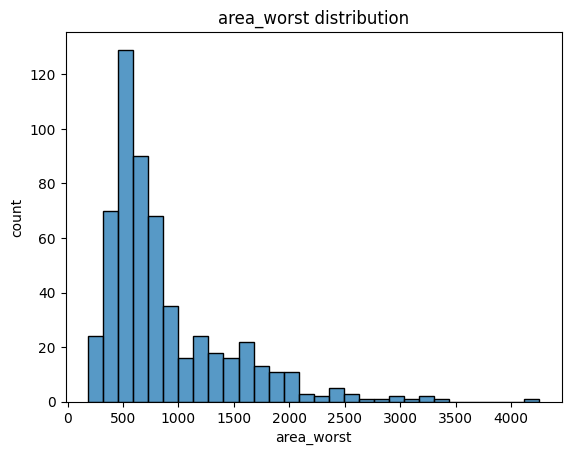

In [146]:
sns.histplot(x="area_worst",data=df)
plt.title("area_worst distribution")
plt.xlabel("area_worst")
plt.ylabel("count")
plt.show()

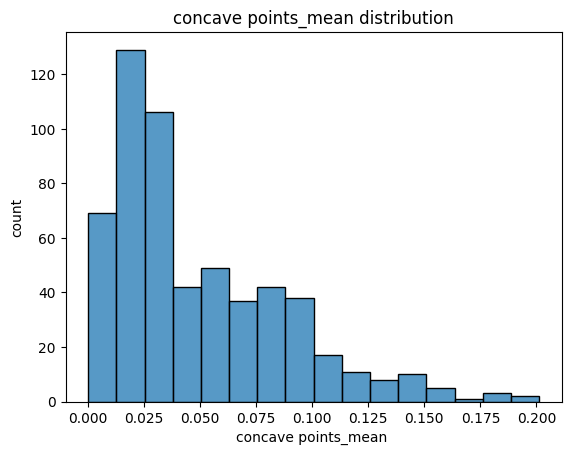

In [147]:
sns.histplot(x="concave points_mean",data=df)
plt.title("concave points_mean distribution")
plt.xlabel("concave points_mean ")
plt.ylabel("count")
plt.show()

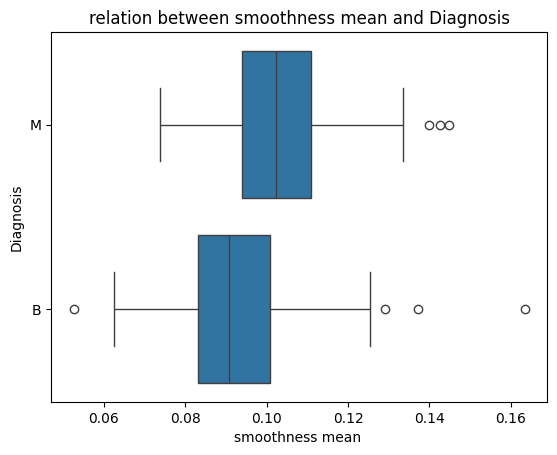

In [148]:
sns.boxplot(x="smoothness_mean",y="Diagnosis",data=df)
plt.title("relation between smoothness mean and Diagnosis")
plt.xlabel("smoothness mean ")
plt.ylabel("Diagnosis")
plt.show()

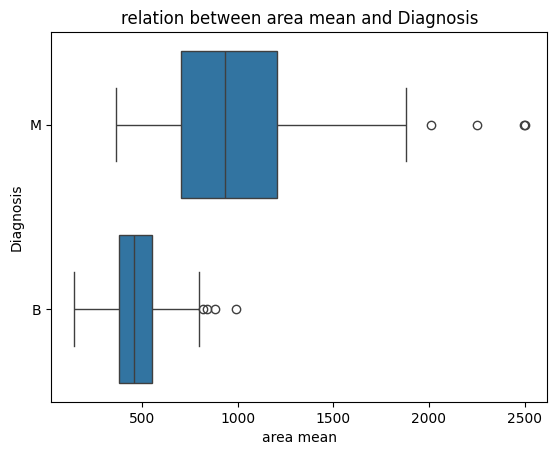

In [149]:
sns.boxplot(x="area_mean",y="Diagnosis",data=df)
plt.title("relation between area mean and Diagnosis")
plt.xlabel("area mean")
plt.ylabel("Diagnosis")
plt.show()

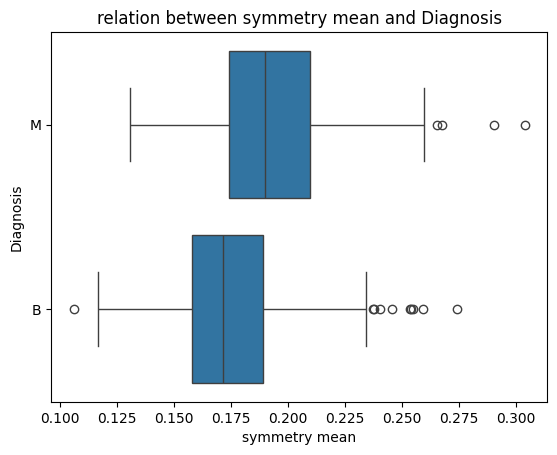

In [150]:
sns.boxplot(x="symmetry_mean",y="Diagnosis",data=df)
plt.title("relation between symmetry mean and Diagnosis")
plt.xlabel("symmetry mean")
plt.ylabel("Diagnosis")
plt.show()

In [151]:
df["Diagnosis"].value_counts()

,count
Diagnosis,
B,357
M,212


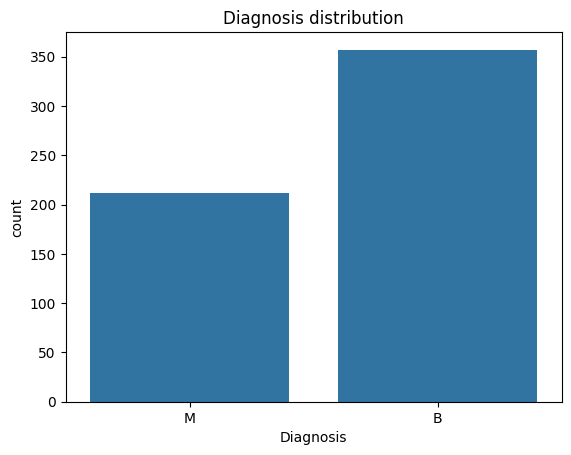

In [152]:
sns.countplot(x="Diagnosis",data=df)
plt.title("Diagnosis distribution")
plt.xlabel("Diagnosis")
plt.ylabel("count")
plt.show()

In [153]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df["Diagnosis"]=encoder.fit_transform(df["Diagnosis"])

In [154]:
df=df.drop(columns="ID number",axis=1)

In [155]:
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [156]:
x=df.drop(columns="Diagnosis",axis=1)
y=df["Diagnosis"]

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [158]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [159]:
model=LogisticRegression(max_iter=1000,class_weight="balanced")
model.fit(x_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [160]:
y_test_predict=model.predict(x_test_scaled)

In [161]:
y_train_predict=model.predict(x_train_scaled)

In [162]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report, accuracy_score

In [163]:
cm=confusion_matrix(y_test,y_test_predict)

In [164]:
print(cm)

[[71  1]
 [ 2 40]]


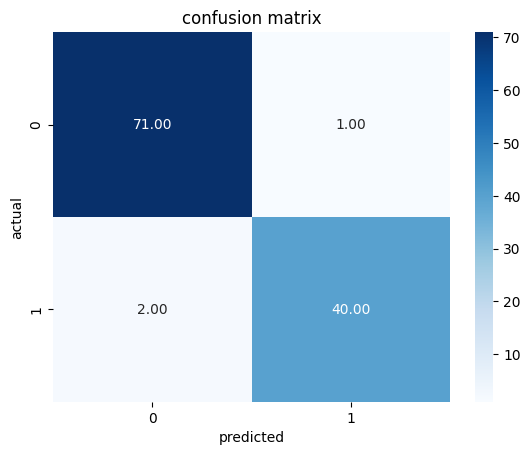

In [165]:
sns.heatmap(cm,annot=True,fmt=".2f",cmap="Blues")
plt.title("confusion matrix")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

the model's false positives and false negatives are very low so the model makes very low error rates , but the false positive is higher ,knowing that the medical consequences of the false negative is more dangerous than false positive so we should focus more on false negative value

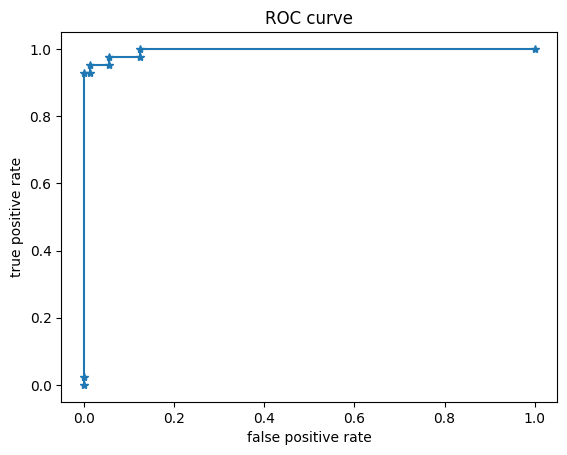

In [166]:
y_pre_prob=model.predict_proba(x_test_scaled)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pre_prob)

plt.plot(fpr,tpr,marker="*")
plt.title("ROC curve")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [167]:
auc=roc_auc_score(y_test,y_pre_prob)
print("area under the curve:")
print(auc)

area under the curve:
0.9953703703703703


In [168]:
report=classification_report(y_test,y_test_predict)
print("classification report:")
print(report)

classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [170]:
train_acc=accuracy_score(y_train,y_train_predict)
print(train_acc)

0.9868131868131869


In [171]:
test_acc=accuracy_score(y_test,y_test_predict)
print(train_acc)

0.9868131868131869


both the training and testing performances are so good and have high accuracy (no underfitting) and very close to each other (no overfitting)